### Nice job overall. The simulations you ran did still have 2nd order valleys, though. So your values for spacing are a bit high. For an example, see Emma's simulation, which had only 1st order valleys. Total: 23/25

# Running two or more components

Now we're going to take a similar approach but this time combine the outputs of three distinct Landlab components: the diffuser, the monodirectional flow router, and the stream power incisor. For clarity, we're going to repeat the whole process from the start.

So first, let's import everything we don't already have:

In [17]:
%pylab inline
from landlab.components import LinearDiffuser
from landlab.plot import imshow_grid
from landlab import RasterModelGrid, CLOSED_BOUNDARY, FIXED_VALUE_BOUNDARY
from matplotlib.pyplot import figure, show, plot, xlabel, ylabel, title
import numpy as np

from landlab.components import FlowRouter, FastscapeEroder
from landlab import load_params

from pylab import savefig
from pylab import matplotlib
import pandas

import numpy # for the zeros
import matplotlib


# the following line makes figures show up correctly in this document (only needed for iPython notebook)
%matplotlib inline
#%matplotlib

Populating the interactive namespace from numpy and matplotlib


# Number 1

Completed loop 0
Completed loop 100
Completed loop 200
Completed loop 300
Completed loop 400
Completed loop 500
Completed loop 600
Completed loop 700
Completed loop 800
Completed loop 900
[ 0.00142857  0.          0.          0.          0.        ]


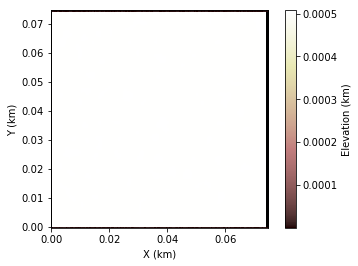

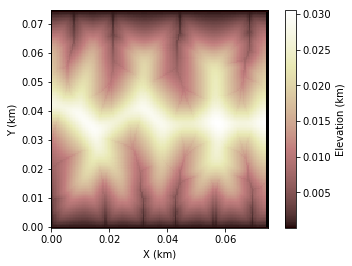

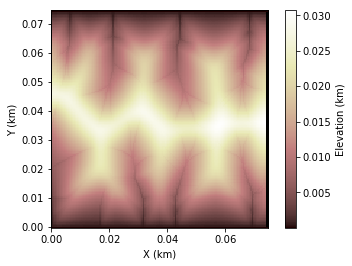

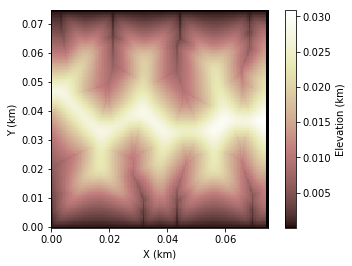

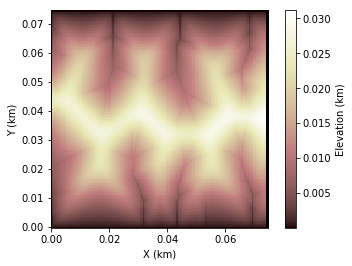

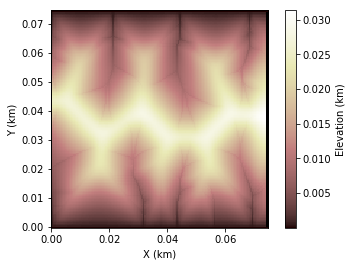

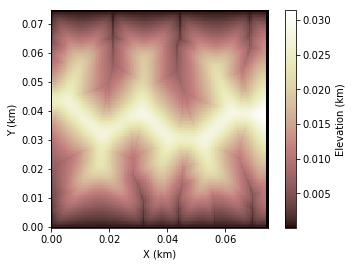

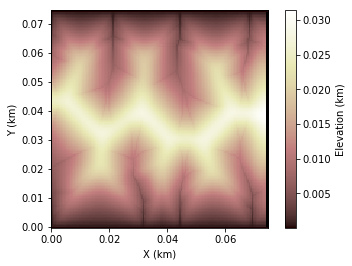

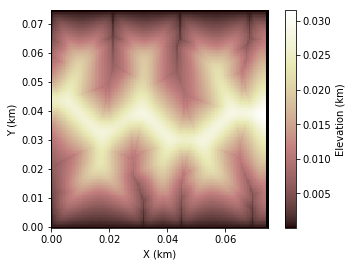

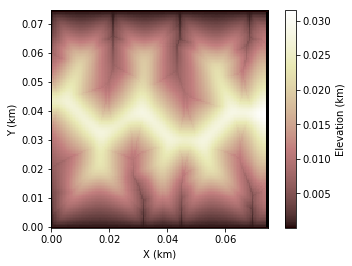

In [4]:
## Define parameters
####################

# Import parameters from a txt file
#input_file = './coupled_params_celia.txt'
#inputs = load_params(input_file) # load the data into a dictionary



# Write paramter from txt file
nrows = 150 # Nombre de ligne
ncols = 150 # Nombre de colonne
dx = 0.0005 # Espacement dans les deux directions [km]
uplift_rate = 0.001 #
total_t = 500.
dt = 0.5

inputs={'m_sp': 0.5, 'K_sp': 0.49, 'n_sp': 1.0, 'linear_diffusivity': 0.000001}

#Set parameters for modelisation
nt = int(total_t // dt) #this is how many loops we'll need
uplift_per_step = uplift_rate * dt

# Now instantiate the grid, set the initial conditions, and set the boundary conditions:
mg = RasterModelGrid((nrows, ncols), dx)
z = mg.add_zeros('node', 'topographic__elevation')
# add some roughness, as this lets "natural" channel planforms arise
initial_roughness = np.random.rand(z.size)/100000.
z += initial_roughness
for edge in (mg.nodes_at_left_edge, mg.nodes_at_right_edge):
    mg.status_at_node[edge] = CLOSED_BOUNDARY
for edge in (mg.nodes_at_top_edge, mg.nodes_at_bottom_edge):
    mg.status_at_node[edge] = FIXED_VALUE_BOUNDARY


# instantiate components
fr = FlowRouter(mg, **inputs)
sp = FastscapeEroder(mg, **inputs)
lin_diffuse = LinearDiffuser(mg, **inputs) 
# run
z[:] = initial_roughness
#figure('topo with diffusion')
for i in range(nt):
    lin_diffuse.run_one_step(dt)  # no diffusion this time
    fr.run_one_step() # route_flow isn't time sensitive, so it doesn't take dt as input
    sp.run_one_step(dt)
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step # add the uplift
    if i % 100 == 0:
        print ('Completed loop %d' % i)
        figure()
#        #figsize(15,5)
        imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'], var_name='Elevation (km)')
#        savefig('topo%d.jpg' % i )
        
# plot
#figure('topo with diffusion')
#imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'],
#            var_name='Elevation (km)')

D = inputs['linear_diffusivity']
K = inputs['K_sp']
m = inputs['m_sp']

Lc= (D/K)**(1./(2.*m+1))
print Lc


# Number 2

Completed loop 0
Completed loop 100
Completed loop 200
Completed loop 300
Completed loop 400
Completed loop 500
Completed loop 600
Completed loop 700
Completed loop 800
Completed loop 900
[ 0.00142857  0.00142857  0.          0.          0.        ]


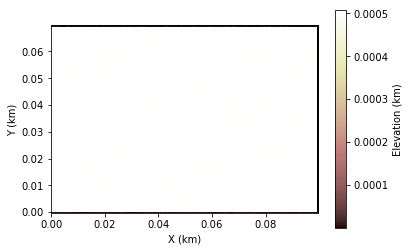

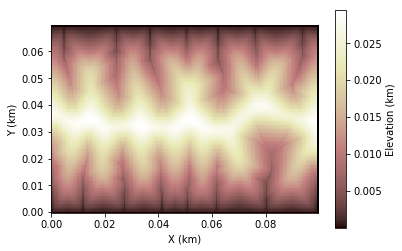

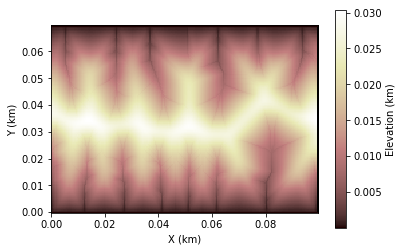

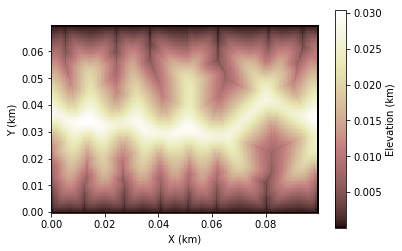

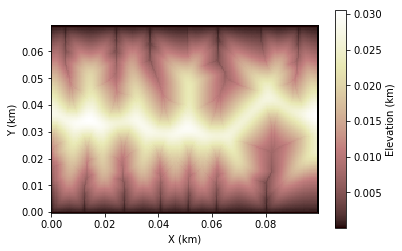

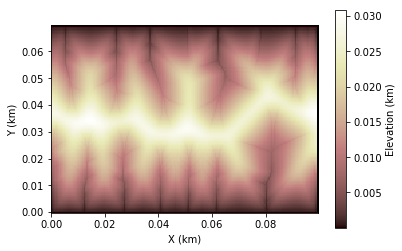

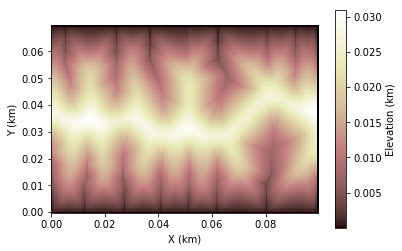

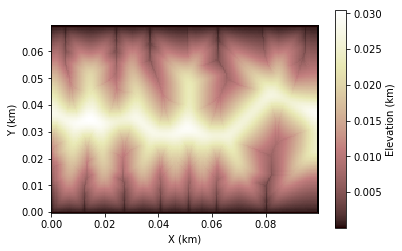

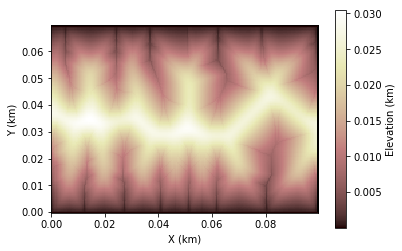

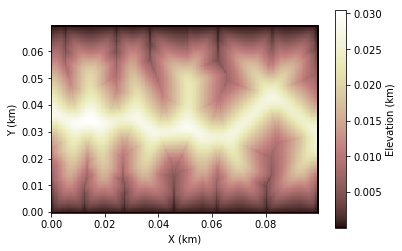

In [5]:

# Write paramter from txt file
nrows = 140 # Nombre de ligne
ncols = 200 # Nombre de colonne
dx = 0.0005 # Espacement dans les deux directions [km]
uplift_rate = 0.001 #
total_t = 500.
dt = 0.5

inputs={'m_sp': 0.5, 'K_sp': 0.49, 'n_sp': 1.0, 'linear_diffusivity': 0.000001}

#Set parameters for modelisation
nt = int(total_t // dt) #this is how many loops we'll need
uplift_per_step = uplift_rate * dt

# Now instantiate the grid, set the initial conditions, and set the boundary conditions:
mg = RasterModelGrid((nrows, ncols), dx)
z = mg.add_zeros('node', 'topographic__elevation')
# add some roughness, as this lets "natural" channel planforms arise
initial_roughness = np.random.rand(z.size)/100000.
z += initial_roughness
for edge in (mg.nodes_at_left_edge, mg.nodes_at_right_edge):
    mg.status_at_node[edge] = CLOSED_BOUNDARY
for edge in (mg.nodes_at_top_edge, mg.nodes_at_bottom_edge):
    mg.status_at_node[edge] = FIXED_VALUE_BOUNDARY

# instantiate components
fr = FlowRouter(mg, **inputs)
sp = FastscapeEroder(mg, **inputs)
lin_diffuse = LinearDiffuser(mg, **inputs) 
# run
z[:] = initial_roughness
#figure('topo with diffusion')
for i in range(nt):
    lin_diffuse.run_one_step(dt)  # no diffusion this time
    fr.run_one_step() # route_flow isn't time sensitive, so it doesn't take dt as input
    sp.run_one_step(dt)
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step # add the uplift
    if i % 100 == 0:
        print ('Completed loop %d' % i)
        figure()
#        #figsize(15,5)
        imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'], var_name='Elevation (km)')
#        savefig('topo%d.jpg' % i )
        
# plot
#figure('topo with diffusion')
#imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'],
#            var_name='Elevation (km)')

D = inputs['linear_diffusivity']
K = inputs['K_sp']
m = inputs['m_sp']
Lc = (D/K)**(1./(2.*m+1))
print Lc


# Number 3

Completed loop 0
Completed loop 200
Completed loop 400
Completed loop 600
Completed loop 800
[ 0.00142857  0.00142857  0.00142857  0.          0.        ]


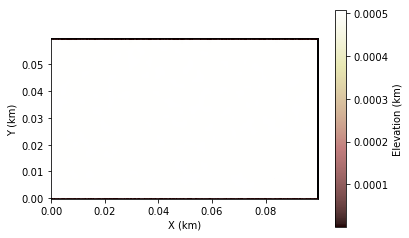

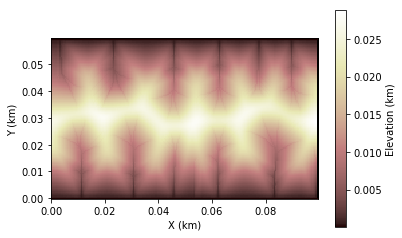

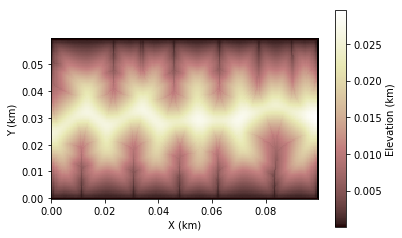

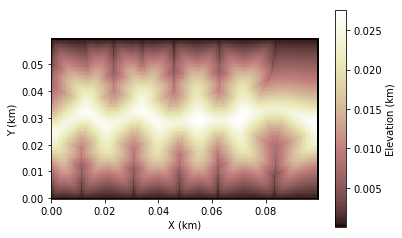

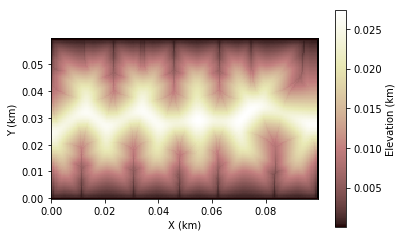

In [28]:

# Write paramter from txt file
nrows =  120 # Nombre de ligne
ncols = 200 # Nombre de colonne
dx = 0.0005 # Espacement dans les deux directions [km]
uplift_rate = 0.001 #
total_t = 500.
dt = 0.5

inputs={'m_sp': 0.5, 'K_sp': 0.49, 'n_sp': 1.0, 'linear_diffusivity': 0.000001}

#Set parameters for modelisation
nt = int(total_t // dt) #this is how many loops we'll need
uplift_per_step = uplift_rate * dt

# Now instantiate the grid, set the initial conditions, and set the boundary conditions:
mg = RasterModelGrid((nrows, ncols), dx)
z = mg.add_zeros('node', 'topographic__elevation')
# add some roughness, as this lets "natural" channel planforms arise
initial_roughness = np.random.rand(z.size)/100000.
z += initial_roughness
for edge in (mg.nodes_at_left_edge, mg.nodes_at_right_edge):
    mg.status_at_node[edge] = CLOSED_BOUNDARY
for edge in (mg.nodes_at_top_edge, mg.nodes_at_bottom_edge):
    mg.status_at_node[edge] = FIXED_VALUE_BOUNDARY

# instantiate components
fr = FlowRouter(mg, **inputs)
sp = FastscapeEroder(mg, **inputs)
lin_diffuse = LinearDiffuser(mg, **inputs) 
# run
z[:] = initial_roughness
#figure('topo with diffusion')
for i in range(nt):
    lin_diffuse.run_one_step(dt)  # no diffusion this time
    fr.run_one_step() # route_flow isn't time sensitive, so it doesn't take dt as input
    sp.run_one_step(dt)
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step # add the uplift
    if i % 200 == 0:
        print ('Completed loop %d' % i)
        figure()
#        #figsize(15,5)
        imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'], var_name='Elevation (km)')
#        savefig('topo%d.jpg' % i )
        
# plot
#figure('topo with diffusion')
#imshow_grid(mg, 'topographic__elevation', grid_units=['km','km'],
#            var_name='Elevation (km)')

D = inputs['linear_diffusivity']
K = inputs['K_sp']
m = inputs['m_sp']

Lc = (D/K)**(1./(2.*m+1))
print Lc


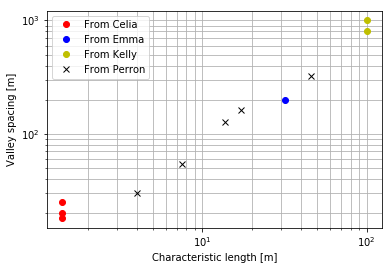

In [27]:
LCcelia=[1.4,1.4,1.4]
LCemma=[32.]
LCkelly=[100.,100.]
LCperron=[4.,7.5,13.7,17.2,46.0]
Wcelia=[25.,18.,20.]
Wemma=[200.]
Wkelly=[800.,1000.]
Wperron=[30.,54.,128.,163.,321.]
loglog(LCcelia,Wcelia,'or')
loglog(LCemma,Wemma,'ob')
loglog(LCkelly,Wkelly,'oy')
loglog(LCperron,Wperron,'xk')
legend(['From Celia','From Emma','From Kelly','From Perron'])
xlabel('Characteristic length [m]')
ylabel('Valley spacing [m]')
grid(True,which='both')


To get the characteristic length Lc around 100, we had to lower the resolution, because the code was running too slow, and inversely, we augmented the resolution when having a characteristic length around 1, to avoid visualizing only pixels. 

Our results are more or less coherent with what was found by Perron 2009. When Lc is small (especially the ration between D and K) the valley spacing are smaller and this is visible when reducing the surface area of the plot to get only first order valleys.
